In [1]:
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import matplotlib.pyplot as plt

In [56]:
# read prepared data
df_umsatz = pd.read_csv("../0_DataPreparation/Data/umsatz_gesamt_feiertage.csv", parse_dates=['Datum'])
df_umsatz = df_umsatz.sort_values(["Warengruppe", "Datum", "Umsatz"]).reset_index(drop=True)
df_umsatz

,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,sunday_or_holiday
0,2013-07-01,1.0,148.828353,Monday,Brot,0,6.0,17.8375,15.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,2013-07-02,1.0,159.793757,Tuesday,Brot,0,3.0,17.3125,10.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2013-07-03,1.0,111.885594,Wednesday,Brot,0,7.0,21.0750,6.0,61.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,2013-07-04,1.0,168.864941,Thursday,Brot,0,7.0,18.8500,7.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,2013-07-05,1.0,171.280754,Friday,Brot,0,5.0,19.9750,12.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,2017-12-21,6.0,87.471228,Thursday,Saisonbrot,0,7.0,6.2375,10.0,21.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
9330,2017-12-22,6.0,71.911652,Friday,Saisonbrot,0,7.0,5.7625,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9331,2017-12-23,6.0,84.062223,Saturday,Saisonbrot,0,7.0,7.8000,19.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9332,2017-12-24,6.0,60.981969,Sunday,Saisonbrot,0,7.0,8.1125,16.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [57]:
# read train.csv template
df_tmp = pd.read_csv("train.csv", parse_dates=['Datum'])
df_tmp

,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754
...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228
9330,1712226,2017-12-22,6,71.911652
9331,1712236,2017-12-23,6,84.062223
9332,1712246,2017-12-24,6,60.981969


In [58]:
# merge the data with the template
df_umsatz_id = pd.merge(df_tmp, df_umsatz, on=['Datum', 'Warengruppe'], how='left')
df_umsatz_id = df_umsatz_id.drop("Umsatz_y", axis = 1)
df_umsatz_id = df_umsatz_id.rename(columns={'Umsatz_x': 'Umsatz'})
df_umsatz_id


,id,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,sunday_or_holiday
0,1307011,2013-07-01,1,148.828353,Monday,Brot,0,6.0,17.8375,15.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,1307021,2013-07-02,1,159.793757,Tuesday,Brot,0,3.0,17.3125,10.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1307031,2013-07-03,1,111.885594,Wednesday,Brot,0,7.0,21.0750,6.0,61.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,1307041,2013-07-04,1,168.864941,Thursday,Brot,0,7.0,18.8500,7.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,1307051,2013-07-05,1,171.280754,Friday,Brot,0,5.0,19.9750,12.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228,Thursday,Saisonbrot,0,7.0,6.2375,10.0,21.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
9330,1712226,2017-12-22,6,71.911652,Friday,Saisonbrot,0,7.0,5.7625,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9331,1712236,2017-12-23,6,84.062223,Saturday,Saisonbrot,0,7.0,7.8000,19.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9332,1712246,2017-12-24,6,60.981969,Sunday,Saisonbrot,0,7.0,8.1125,16.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [60]:
df_umsatz_id["sunday_or_holiday"]

0       0
1       0
2       0
3       0
4       0
       ..
9329    0
9330    0
9331    0
9332    1
9333    0
Name: sunday_or_holiday, Length: 9334, dtype: int64

In [62]:
# select features
features = ["KielerWoche","sunday_or_holiday"]
X = df_umsatz_id[features]
Y = df_umsatz_id["Umsatz"]

# Scale the feature data to standardize the range
scalar = StandardScaler()

# apply standardization of features to umsatz dataframe
standardized_features = pd.DataFrame(scalar.fit_transform(df_umsatz_id[features].copy()), columns = features)
old_shape = df_umsatz_id.shape
# drop the unnormalized features from the dataframe
df_umsatz_id.drop(features, axis = 1, inplace = True)
# join back the normalized features
df_umsatz_id = pd.concat([df_umsatz_id, standardized_features], axis= 1)
df_umsatz_id


,id,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,KielerWoche,sunday_or_holiday
0,1307011,2013-07-01,1,148.828353,Monday,Brot,6.0,17.8375,15.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
1,1307021,2013-07-02,1,159.793757,Tuesday,Brot,3.0,17.3125,10.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156448,-0.427454
2,1307031,2013-07-03,1,111.885594,Wednesday,Brot,7.0,21.0750,6.0,61.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
3,1307041,2013-07-04,1,168.864941,Thursday,Brot,7.0,18.8500,7.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
4,1307051,2013-07-05,1,171.280754,Friday,Brot,5.0,19.9750,12.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156448,-0.427454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228,Thursday,Saisonbrot,7.0,6.2375,10.0,21.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
9330,1712226,2017-12-22,6,71.911652,Friday,Saisonbrot,7.0,5.7625,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.156448,-0.427454
9331,1712236,2017-12-23,6,84.062223,Saturday,Saisonbrot,7.0,7.8000,19.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
9332,1712246,2017-12-24,6,60.981969,Sunday,Saisonbrot,7.0,8.1125,16.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.156448,2.339435


In [63]:
# Convert the 'Datum' column to datetime
df_umsatz_id['Datum'] = pd.to_datetime(df_umsatz_id['Datum'])

# Split the DataFrame into two based on the specified date ranges
df_umsatz_train = df_umsatz_id[df_umsatz_id['Datum'] <= '2017-07-31']
df_umsatz_test = df_umsatz_id[(df_umsatz_id['Datum'] > '2017-07-31') & (df_umsatz_id['Datum'] <= '2018-07-31')]
df_umsatz_test = df_umsatz_test.reset_index(drop=True)
df_umsatz_train

,id,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,KielerWoche,sunday_or_holiday
0,1307011,2013-07-01,1,148.828353,Monday,Brot,6.0,17.8375,15.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
1,1307021,2013-07-02,1,159.793757,Tuesday,Brot,3.0,17.3125,10.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156448,-0.427454
2,1307031,2013-07-03,1,111.885594,Wednesday,Brot,7.0,21.0750,6.0,61.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
3,1307041,2013-07-04,1,168.864941,Thursday,Brot,7.0,18.8500,7.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
4,1307051,2013-07-05,1,171.280754,Friday,Brot,5.0,19.9750,12.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156448,-0.427454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,1612226,2016-12-22,6,54.322960,Thursday,Saisonbrot,7.0,5.2500,8.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.156448,-0.427454
9274,1612236,2016-12-23,6,133.499200,Friday,Saisonbrot,7.0,6.3750,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.156448,-0.427454
9275,1612246,2016-12-24,6,39.577538,Saturday,Saisonbrot,6.0,6.1250,14.0,95.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.156448,-0.427454
9276,1612276,2016-12-27,6,48.890718,Tuesday,Saisonbrot,6.0,8.2500,21.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156448,-0.427454


In [64]:
# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(df_umsatz_train[features])

# Train the linear regression model using Statsmodels
model = sm.OLS(df_umsatz_train["Umsatz"], X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     63.23
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           5.88e-28
Time:                        10:30:25   Log-Likelihood:                -48001.
No. Observations:                7493   AIC:                         9.601e+04
Df Residuals:                    7490   BIC:                         9.603e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               209.3365      1.69

In [65]:
# Make predictions on the test set
X_test = sm.add_constant(df_umsatz_test[features])  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

Predictions for test data: 0       200.775711
1       200.775711
2       200.775711
3       200.775711
4       200.775711
           ...    
1836    200.775711
1837    200.775711
1838    200.775711
1839    248.675613
1840    200.775711
Length: 1841, dtype: float64


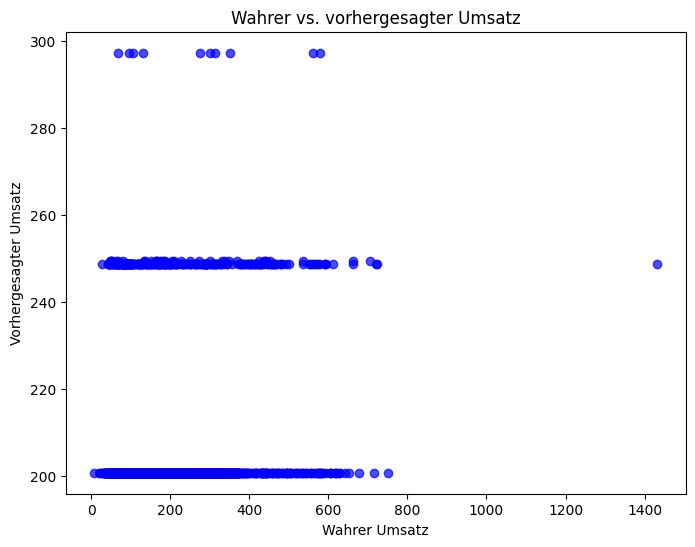

In [66]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions, alpha=0.7, color="blue")
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")
plt.show()